In [144]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

url = "Cars-dataset.csv"
creditData = pd.read_csv(url)

creditData.head(10) 
creditData.isnull().sum()


Age            0
Gender         0
Engineer       0
MBA            0
Work Exp       0
Salary         0
Distance       0
license        0
Opt_service    0
dtype: int64

In [145]:
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1", (2*(metrics.precision_score(y_train,pred_train) * metrics.recall_score(y_train,pred_train))/(metrics.precision_score(y_train,pred_train) + metrics.recall_score(y_train,pred_train))))
    
    return score_list # returning the list with train and test scores

In [146]:
# Creating X and Y variables

X = creditData.drop(['Opt_service'],axis=1)

y = creditData['Opt_service']

 

# creating dummies for Gender

X= pd.get_dummies(X, columns = ['Gender'],drop_first = True)

# Splitting data into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print(X_train.shape, X_test.shape)

 

#checking percentage of classes in y_test

print(y_test.value_counts(1))

(292, 8) (126, 8)
0    0.912698
1    0.087302
Name: Opt_service, dtype: float64


Accuracy on training set :  1.0
Accuracy on test set :  0.9761904761904762
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.7857142857142857
F1 1.0
BaggingClassifier(random_state=1)


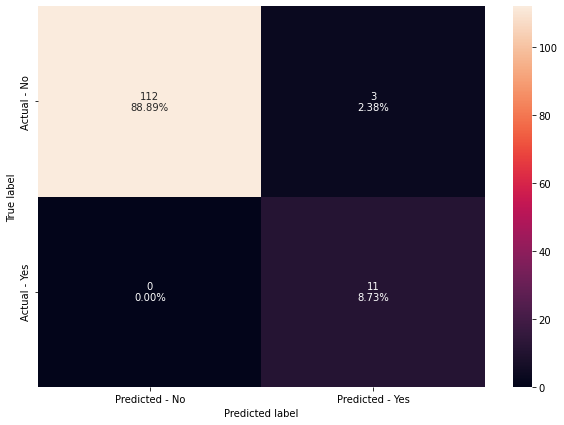

In [147]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)
make_confusion_matrix(bagging_estimator,y_test)
print(bagging_estimator)

Accuracy on training set :  0.9931506849315068
Accuracy on test set :  0.9920634920634921
Recall on training set :  0.9166666666666666
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 0.9565217391304348
BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)


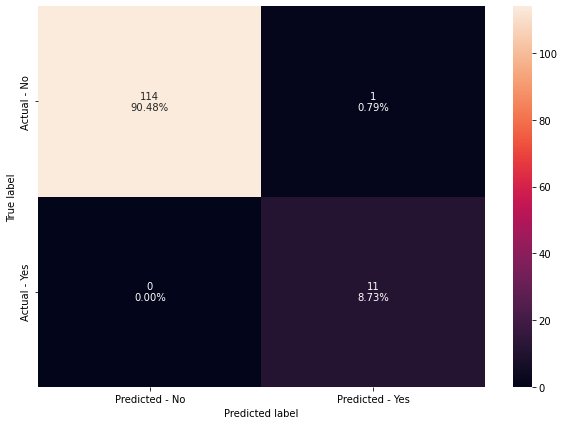

In [148]:
bagging_estimator = BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)

bagging_estimator.fit(X_train,y_train)
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(bagging_estimator)
make_confusion_matrix(bagging_estimator,y_test)
print(bagging_estimator)


Accuracy on training set :  0.9691780821917808
Accuracy on test set :  0.9841269841269841
Recall on training set :  0.625
Recall on test set :  0.8181818181818182
Precision on training set :  1.0
Precision on test set :  1.0
F1 0.7692307692307693
RandomForestClassifier(max_depth=1, random_state=1)
Accuracy on training set :  0.976027397260274
Accuracy on test set :  0.9920634920634921
Recall on training set :  0.7083333333333334
Recall on test set :  0.9090909090909091
Precision on training set :  1.0
Precision on test set :  1.0
F1 0.8292682926829268
RandomForestClassifier(max_depth=2, random_state=1)
Accuracy on training set :  0.9897260273972602
Accuracy on test set :  0.9920634920634921
Recall on training set :  0.875
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 0.9333333333333333
RandomForestClassifier(max_depth=3, random_state=1)
Accuracy on training set :  0.9965753424657534
Accuracy on test set :  0.9920634920634921
R

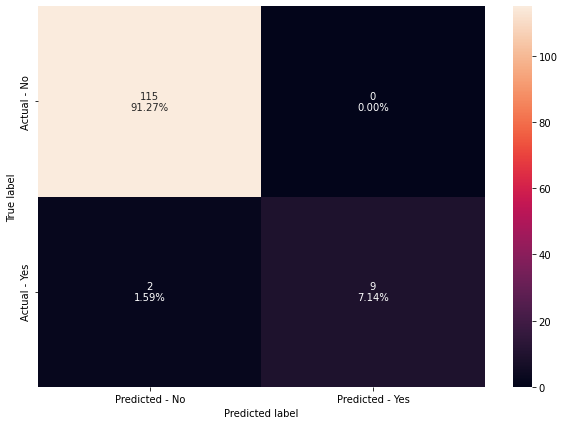

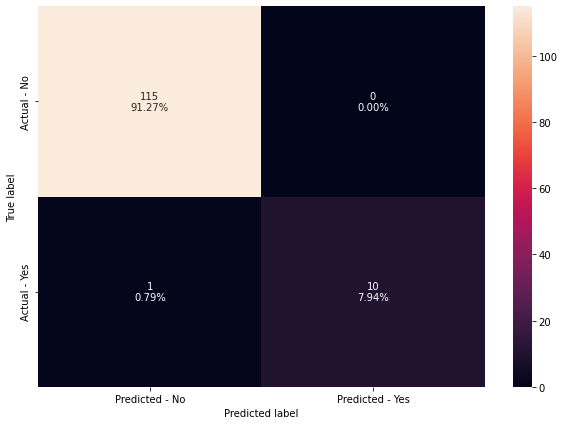

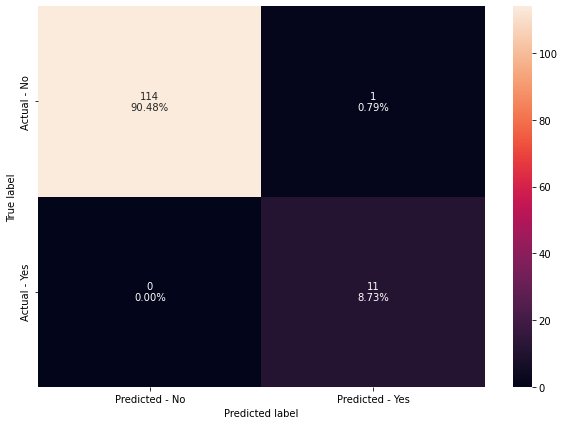

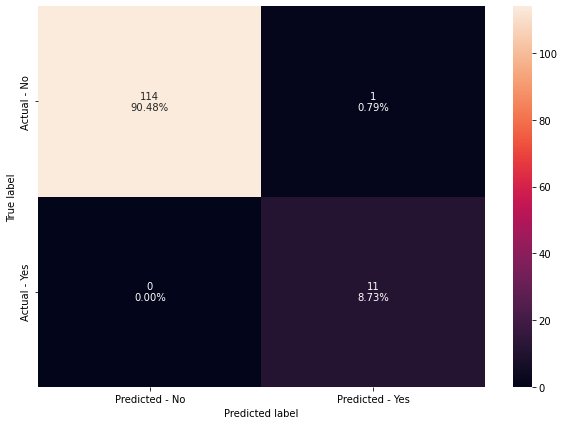

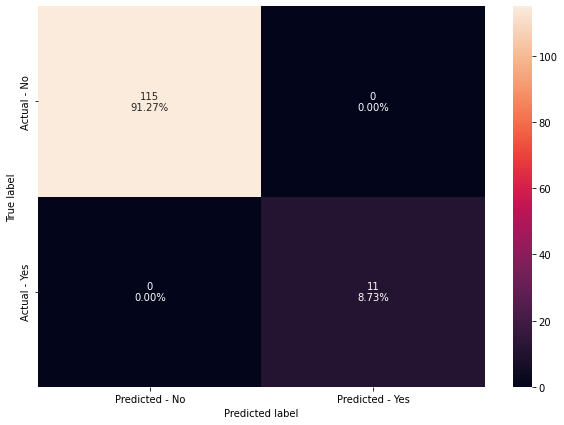

In [149]:
for x in range(5):
    rf_estimator = RandomForestClassifier(random_state=1, max_depth=x+1)

    rf_estimator.fit(X_train,y_train)
    #Using above defined function to get accuracy, recall and precision on train and test set
    bagging_estimator_score=get_metrics_score(rf_estimator)
    make_confusion_matrix(rf_estimator,y_test)
    print(rf_estimator)


In [150]:

parameters = {'min_samples_split': [2, 8], 
              'n_estimators' : [10,30,50,70],
             }
acc_scorer = metrics.make_scorer(metrics.f1_score)
grid_obj = GridSearchCV(rf_estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=30, random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9920634920634921
Recall on training set :  1.0
Recall on test set :  1.0
Precision on training set :  1.0
Precision on test set :  0.9166666666666666
F1 1.0
RandomForestClassifier(class_weight='balanced', random_state=1)


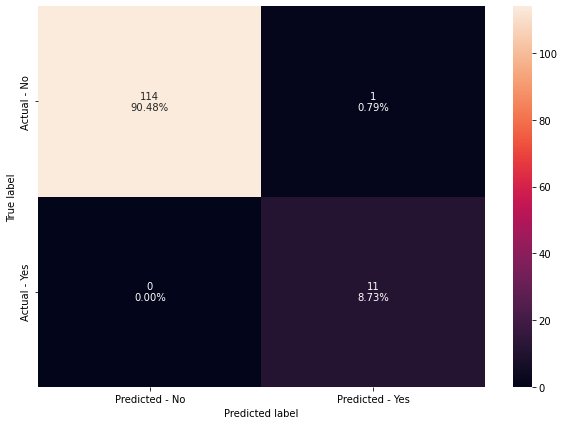

In [151]:
rf_bestimator = RandomForestClassifier(random_state=1, class_weight="balanced")

rf_bestimator.fit(X_train,y_train)
#Using above defined function to get accuracy, recall and precision on train and test set
bagging_estimator_score=get_metrics_score(rf_bestimator)
make_confusion_matrix(rf_bestimator,y_test)
print(rf_bestimator)
